Welcome to (Preceptor) practice session 6! 

In [1]:
import YData 

YData.download_practice_code(6)           # Without Answers. 
YData.download_practice_code(6, True)     # With Answers. 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


YData.download.download_data("States_shapefile.geojson")
YData.download.download_data("state_demographics.csv")

YData.download_data("apple_2024.csv")
YData.download_data("google_2024.csv")


## Choropleth map - Bachelors degreee. 

Let's do a little more practice creating maps by creating a choropleth map of the percentage of people who have bachelors degree in each state. 

Data with the state boundaries and the demographic information are loaded below. Please do the following steps:

1. Join/merge the map data with the demographic data to create a new geoDataFrame called `state_map_demo`.
2. Create a new column in `state_map_demo` called `with_bachelors` that has the percentage of people with bachelors (i.e., we are normalizing our choropleth map).
3. Plot the choropleth showing the percentage with bachelors. Does this map look like you would expect? 


In [2]:
import geopandas as gpd

# The state boundaries data
state_map = gpd.read_file("States_shapefile.geojson")
print(state_map.crs)
state_map.head(3)

EPSG:4326


,FID,Program,State_Code,State_Name,Flowing_St,FID_1,geometry
0,1,PERMIT TRACKING,AL,ALABAMA,F,919,"POLYGON ((-85.07007 31.98070, -85.11515 31.907..."
1,2,,AK,ALASKA,N,920,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824..."
2,3,AZURITE,AZ,ARIZONA,F,921,"POLYGON ((-114.52063 33.02771, -114.55909 33.0..."


In [3]:
# The state demographic information 
state_demographics = pd.read_csv("state_demographics.csv")
state_demographics["State"] = state_demographics["State"].apply(str.upper)
state_demographics.head(3)

,State,under_5,over_64,bachelors_degree,total
0,ALABAMA,295811.997,741954.681,1095959.202,4849377
1,ALASKA,54518.168,69252.808,202601.300,736732
2,ARIZONA,430814.976,1070305.956,1810769.196,6731484


In [4]:
# Join/merge the state map with the state demographic data

state_map_demo = state_map.merge(state_demographics, 
                                 left_on = "State_Name", right_on = "State", how = "left")

In [5]:
# Add a new column called "with_bachelors" to "normalize your map"

state_map_demo["with_bachelors"] = 100 * state_map_demo["bachelors_degree"]/state_map_demo["total"]


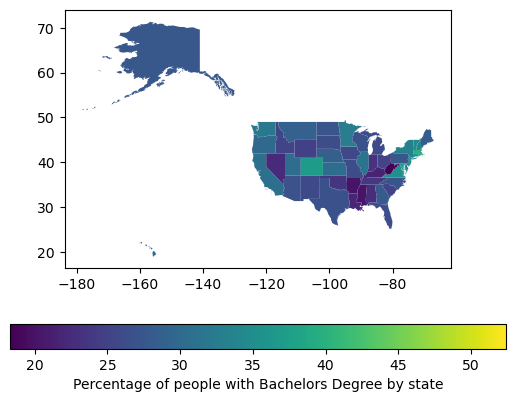

In [6]:
# Plot the choropleth map

state_map_demo.plot(column = "with_bachelors", cmap='viridis', legend = True,
                   legend_kwds={'label': "Percentage of people with Bachelors Degree by state",
                        'orientation': "horizontal"});


# For Loops in Python. 

In [7]:
# Loop over items in a list
a_list = ["first", "second", "third", "forth"]


for item in a_list:
    print(item)


first
second
third
forth


In [8]:
# Loop over every other item in the list
a_list = ["first", "second", "third", "forth"]


for item in a_list[::2]:
    print(item)


first
third


In [9]:
# Loop over mulptiples of 3 (from 0 through 10) using the range() function.

for i in range(0,10)[::3]:
    print(i)


0
3
6
9


In [10]:
# Can you print every other square of the numbers from 1 to 6? 

for i in range(1, 7)[::2]: 
    print(i**2)

1
9
25


In [28]:
# Create a list that has square roots of numbers from 1 through 10. 
# hint: the .append() method will be useful

sqrt = []

for i in range(1, 11):
    
    sqrt.append(i** (1/2))


sqrt


[1.0,
 1.4142135623730951,
 1.7320508075688772,
 2.0,
 2.23606797749979,
 2.449489742783178,
 2.6457513110645907,
 2.8284271247461903,
 3.0,
 3.1622776601683795]

In [12]:
# Sum squares of numbers from 1 to 10.
my_sum = 0

for i in range(1, 11):
    my_sum = my_sum + (i ** 2)

my_sum

385

### The enumerate function. 

In [13]:
# We can use enumerate(my_list) to get both values from a list 
# and sequential index numbers

a_list = ["first", "second", "third", "forth"]

for i, curr_val in enumerate(a_list):
    print(str(i)  + " " + curr_val)


0 first
1 second
2 third
3 forth


### The zip function. 

In [14]:
# Use the zip function to print the same output as in the cell above.  

b_list = ["0", "1", "2", "3"]

for i, j in zip(b_list, a_list):
    print(i,j)

0 first
1 second
2 third
3 forth


In [15]:
# Zip example from class. 
list_1 = ["a", "b", "c"]
list_2 = ["x", "y", "z"]

for item1, item2 in zip(list_1, list_2):
    print(item1, item2)


a x
b y
c z


### Exercise 

The code below extracts closing prices of apple and google stocks for the year 2024.

Please use for loops to create a list called `daily_diff` that has the apple closing price - google closing price for each day.

There are a few ways to do this, so see if you can come up with a solution that works. Try to do this without using numpy, and once you have a solution, see if you can get the same result using numpy.  



In [16]:
apple = pd.read_csv("apple_2024.csv")
google = pd.read_csv("google_2024.csv")

In [17]:
apple_close = apple["Close"].to_list()
google_close = google["Close"].to_list()

In [ ]:
# First way to solve the problem. 

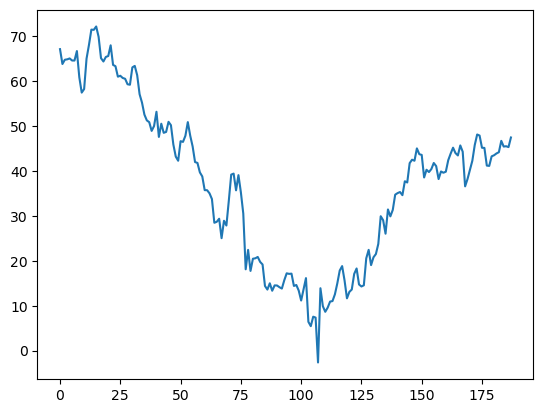

In [18]:


# Start with an empty list
daily_diff = [];


# Use a for loop to add the closing price for each day
for i in range(len(google_close)):

    google = google_close[i]
    apple = apple_close[i]
    daily_diff.append(apple - google)



# Plot the range of temperatures
plt.plot(daily_diff);


In [ ]:
# Alternative solution using the zip function. 

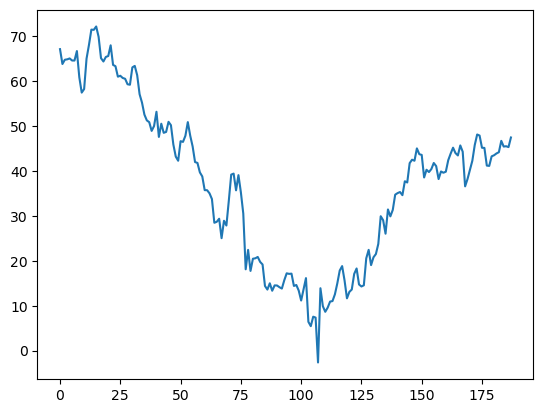

In [19]:
# Alternative solution using the zip function...

# Start with an empty list
daily_diff2 = [];


# Use a for loop to add the temperature range for each day
for i, j in zip(apple_close, google_close):

    daily_diff2.append(i - j)



# Plot the range of temperatures
plt.plot(daily_diff2);


##  Conditional Statements 

Conditional statements allow use to excecute particular pieces of code when certain conditions are met; i.e., they execute a piece of code when a Boolean value is True. 

Let's explore!

In [20]:
# Let us quickly take a look at the following from the class. 

num_semesters = 3

if num_semesters <= 0:
    print('Not a valid input')
elif num_semesters <= 2:
    print('First Year')
elif num_semesters <= 4:
    print('Sophomore')
elif num_semesters <= 6:
    print('Junior')
elif num_semesters <= 8:
    print('Senior')
else:
    print("NA")


Sophomore


In [21]:
# Let us alaos look at a conditional statement in a loop from the class. 

for num_semesters in range(10):
    
    print(num_semesters)

    if num_semesters <= 0:
        print('Not a valid input')
    elif num_semesters <= 2:
        print('First Year')
    elif num_semesters <= 4:
        print('Sophomore')
    elif num_semesters <= 6:
        print('Junior')
    elif num_semesters <= 8:
        print('Senior')
    else:
        print("NA")


0
Not a valid input
1
First Year
2
First Year
3
Sophomore
4
Sophomore
5
Junior
6
Junior
7
Senior
8
Senior
9
NA


## Exercise. 
## Write a Python program to find those numbers which are divisible by 7 and multiples of 5, between 1500 and 2700 (both included).
Recall `%` symbol in Python is called the Modulo Operator. It returns the remainder of dividing the left hand operand by right hand operand.

In [22]:
# Create an empty list to store numbers that meet the given conditions
new_list = []

# Iterate through numbers from 1500 to 2700 (inclusive)
for i in range(1500, 2701):
    # Check if the number is divisible by 7 and 5 without any remainder
    if (i % 7 == 0) and (i % 5 == 0):
        # If the conditions are met, convert the number to a string and append it to the list
        new_list.append(str(i))

# Join the numbers in the list with a comma and print the result
print(','.join(new_list))

1505,1540,1575,1610,1645,1680,1715,1750,1785,1820,1855,1890,1925,1960,1995,2030,2065,2100,2135,2170,2205,2240,2275,2310,2345,2380,2415,2450,2485,2520,2555,2590,2625,2660,2695


## 4. Functions!

We have already used many functions in this class that are built into Python or are imported from different modules/packages. 

Let's now write some new functions outselves! 


Write a Python function that squares the input. 

In [23]:
# Write a function that doubles a value.
def double(x):
    return x * 2

Write a Python function to find the maximum of two numbers.

In [24]:
def max_of_two(x, y):
    # Check if x is greater than y
    if x > y:
    # If x is greater, return x
     return x
    # If y is greater or equal to x, return y
    return y



In [25]:
# Let us check our function. 

max_of_two(5, -100)

5

Write a Python function to find the maximum of two numbers.

In [26]:
# Define a function that returns the maximum of three numbers
def max_of_three(x, y, z):
    # Call max_of_two function to find the maximum of y and z,
    # then compare it with x to find the overall maximum
    return max_of_two(x, max_of_two(y, z))




In [27]:
# Print the result of calling max_of_three function with arguments 3, 6, and -5
print(max_of_three(3, 6, -5)) 

6
